In [30]:
# Read the data from ./data/Euro_2012.csv into a DataFrame with column 
# ”Teams” as index. The data is on the UEFA Champtionship 2012 (Euro 2012).

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("01_Data/Euro_2012.csv", index_col="Team")
df.head()

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Team,,,,,,,,,,,,,,,,,,,,,
Croatia,4,13,12,51.9%,16.0%,32,0,0,0,2,...,13,81.3%,41,62,2,9,0,9,9,16
Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
Denmark,4,10,10,50.0%,20.0%,27,1,0,0,3,...,10,66.7%,25,38,8,4,0,7,7,15
England,5,11,18,50.0%,17.2%,40,0,0,0,3,...,22,88.1%,43,45,6,5,0,11,11,16
France,3,22,24,37.9%,6.5%,65,1,0,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [31]:
# How many teams played in the Euro 2012?

df.shape # 16 Teams

(16, 34)

In [32]:
# Which team has the highest shooting accuracy?

df['Shooting Accuracy'] = df['Shooting Accuracy'].str.rstrip('%').astype(
    'float') / 100.0 # convert %String to float
df["Passing Accuracy"] = df["Passing Accuracy"].str.rstrip('%').astype(
    'float') / 100.0
max_acc = df['Shooting Accuracy'].idxmax()
print("Team with highest Shooting Accuracy: %s" % max_acc)

Team with highest Shooting Accuracy: Spain


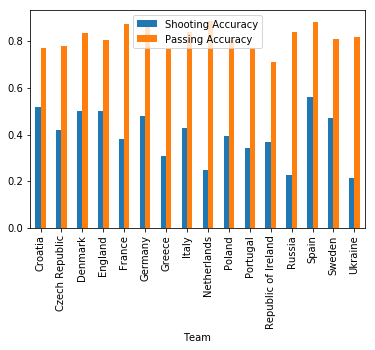

In [33]:
# Plot shooting accuracy versus passing accuracy.

df[['Shooting Accuracy', 'Passing Accuracy']].plot.bar()

In [34]:
# Which team has the second-most shots on target?

df['Shots on target'].sort_values() 
df['Shots on target'].sort_values().shift(-1).idxmax() # Italy

'Italy'

In [35]:
# Eliminate Italy from the dataset. Which team has the second-most 
# shots on target now?

df['Shots on target'].drop(index='Italy').sort_values().shift(-1).idxmax()
# Germany

'Germany'

In [36]:
# How many penalty goals did England score?

df['Penalty goals']['England']

0

In [37]:
# Present only the Shooting Accuracy from England, Italy and Russia.

df['Shooting Accuracy'][['England', 'Russia', 'Italy']]

Team
England    0.500
Russia     0.225
Italy      0.430
Name: Shooting Accuracy, dtype: float64

In [38]:
# Create a new DataFrame called discipline using the columns ”Yellow 
# Cards” and ”Red Cards” (and the index).

discipline = df[['Yellow Cards', 'Red Cards']]
discipline.head()

,Yellow Cards,Red Cards
Team,,
Croatia,9,0
Czech Republic,7,0
Denmark,4,0
England,5,0
France,6,0


In [39]:
# Sort discipline primarily by red cars and secondarily by yellow cards.

discipline.sort_values(by=['Red Cards', 'Yellow Cards'])

,Yellow Cards,Red Cards
Team,,
Denmark,4,0
Germany,4,0
England,5,0
Netherlands,5,0
Ukraine,5,0
France,6,0
Russia,6,0
Czech Republic,7,0
Sweden,7,0


In [40]:
# Output the data as tab-separated textfile ./out/discipline.tsv.

df.to_csv(path_or_buf="02_Output/discipline.tsv", sep="\t")